In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_url = 'https://raw.githubusercontent.com/aniruddha7599/DAIICT-/refs/heads/main/NAFLD%20EDA.csv'
data = pd.read_csv(data_url)

In [44]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 605 entries, 0 to 604
Data columns (total 10 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Age                                                                      605 non-null    float64
 1   Height (cm)                                                              605 non-null    float64
 2   Weight (kg)                                                              605 non-null    float64
 3   Body Mass Index                                                          605 non-null    float64
 4   Waist Circumference (cm)                                                 605 non-null    float64
 5   Hip Circumference (cm)                                                   605 non-null    float64
 6   Gender (Female=0, Male=1)                                                6

In [45]:
# Split the data into features and target variable
X = data.drop(columns=['Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)'])
y = data['Fibrosis status (No=0, Yes=1) (Fibrosis 1 and above, there is Fibrosis)']

In [46]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Initialize the Gaussian Naive Bayes model
class_prior = [0.32, 0.68]  # Example: Adjust based on class distribution
model = GaussianNB(priors=class_prior)

# Train the model
model.fit(X_train, y_train)

GaussianNB(priors=[0.32, 0.68])

In [47]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [48]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [49]:
# Print performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.6978021978021978
Precision: 0.7899159663865546
Recall: 0.7580645161290323
F1 Score: 0.7736625514403292
Confusion Matrix:
 [[33 25]
 [30 94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.57      0.55        58
           1       0.79      0.76      0.77       124

    accuracy                           0.70       182
   macro avg       0.66      0.66      0.66       182
weighted avg       0.71      0.70      0.70       182



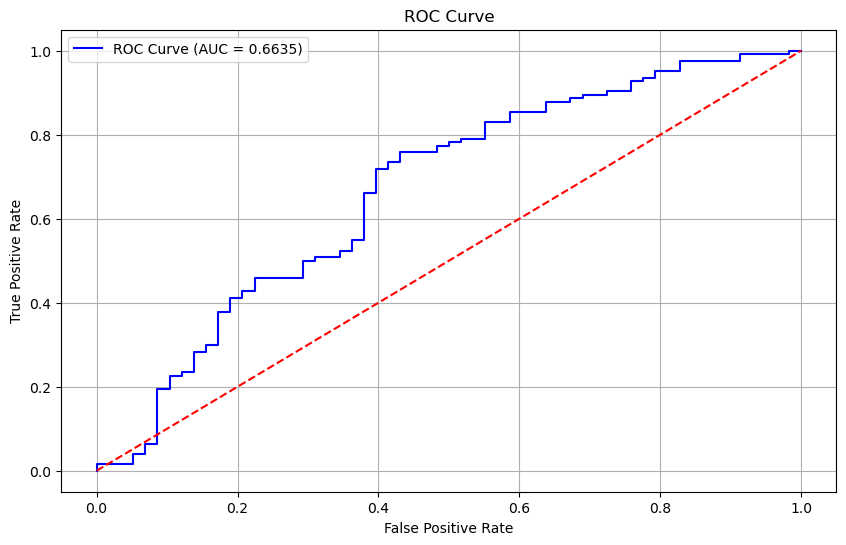

In [50]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

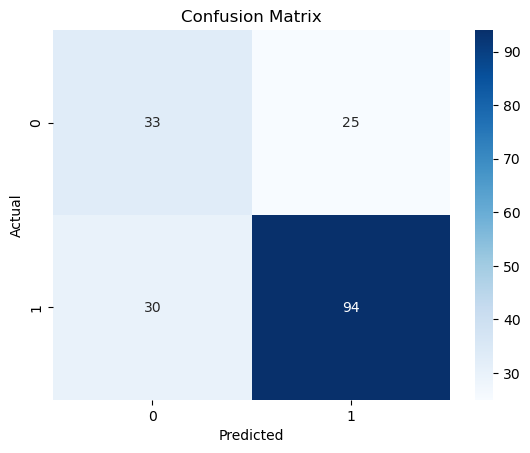

In [51]:
# Heatmap for confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()